## Data Loading

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = None
df=pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')
print(df.shape)
df2=pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')

(12379, 31)


## Data Cleaning 

In [2]:
df.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,no_visited_bars,gender,car,restuarant_same_direction_house,Cooks regularly,Customer type,Qualification,is foodie,no_Take-aways,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,1,less1,Female,NaN,0,1,Individual,Bachelors degree,0,1~3,Unemployed,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,1,never,Female,NaN,1,1,Individual,Bachelors degree,0,1~3,Unemployed,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,1,never,Female,Mazda5,1,0,Individual,Bachelors degree,1,1~3,Arts Design Entertainment Sports & Media,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,1,never,Male,NaN,1,0,Individual,Some college - no degree,1,1~3,Sales & Related,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,1,less1,Female,NaN,0,0,Individual,Some college - no degree,1,gt8,Sales & Related,1,0,3,40,less1,7,Summer,Location C,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [4]:
df.isna().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [5]:
df=df.drop(['car'],axis=1)
df2=df2.drop(['car'],axis=1)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [7]:
y=df['Offer Accepted']
df=df.drop('Offer Accepted',axis=1)
data_backup=df

In [8]:
si=SimpleImputer(strategy='most_frequent')
df=si.fit_transform(df)

In [9]:
df = pd.DataFrame(df, columns=data_backup.columns)

In [10]:
df['Offer Accepted']=y

In [11]:
df.isna().sum().sum()

0

In [12]:
df2.isna().sum().sum()

365

In [13]:
data_backup2=df2
df2=si.transform(df2)

In [14]:
df2 = pd.DataFrame(df2, columns=data_backup2.columns)

### 1.Offer Expiration

In [15]:
a=df['offer expiration'].unique()
print(a)

['2days' '10hours']


In [16]:
df['offer expiration']=df['offer expiration'].replace(a,[48,10])
df2['offer expiration']=df2['offer expiration'].replace(a,[48,10])

### 2.Income Range

In [17]:
IncomeRange=df['income_range'].unique()
print(IncomeRange)

['₹100000 or More' '₹87500 - ₹99999' '₹37500 - ₹49999' 'Less than ₹12500'
 '₹50000 - ₹62499' '₹12500 - ₹24999' '₹75000 - ₹87499' '₹25000 - ₹37499'
 '₹62500 - ₹74999']


In [18]:
income=[125000,93750,43750,10000,56250,18750,81250,31250,68750]
df['income_range']=df['income_range'].replace(IncomeRange,income)
df2['income_range']=df2['income_range'].replace(IncomeRange,income)

### 3. age

In [19]:
age=df['age'].unique()
age

array(['36', '50plus', '26', '46', '21', 'below21', '41', '31'],
      dtype=object)

In [20]:
age_rep=[36,55,26,46,21,16,41,31]
df['age']=df['age'].replace(age,age_rep)
df2['age']=df2['age'].replace(age,age_rep)

### 4. Qualification

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]=(20,10)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Qualification', ylabel='income_range'>

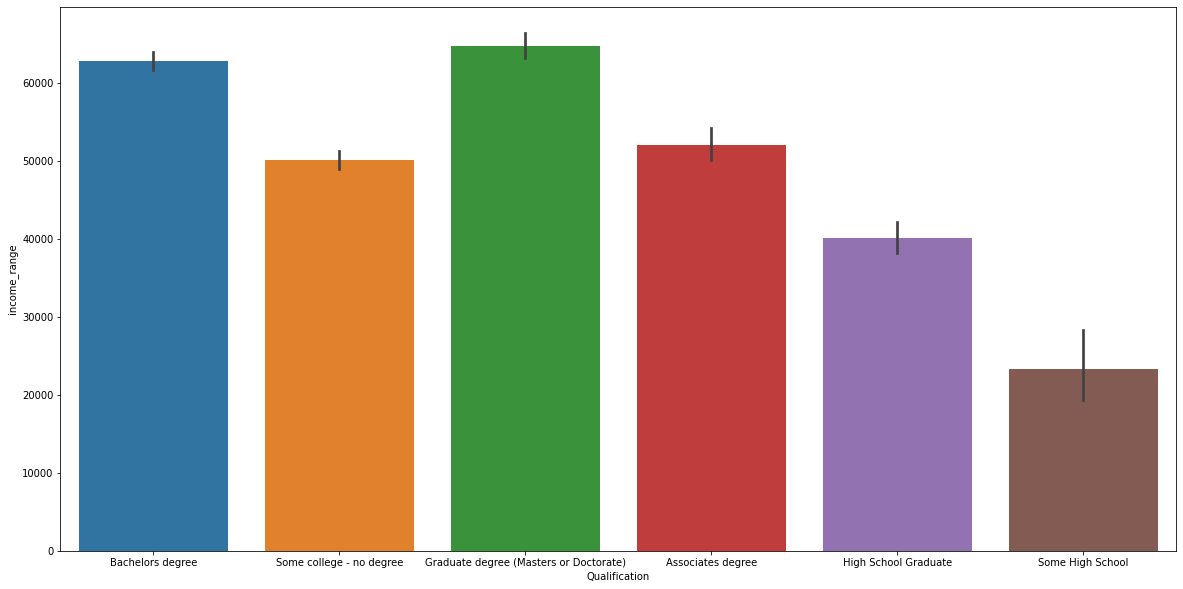

In [22]:
sns.barplot(df['Qualification'],df['income_range'])

In [23]:
quali=df['Qualification'].unique()
quali

array(['Bachelors degree', 'Some college - no degree',
       'Graduate degree (Masters or Doctorate)', 'Associates degree',
       'High School Graduate', 'Some High School'], dtype=object)

In [24]:
quali_replace=[5,3,6,4,2,1]
df['Qualification']=df['Qualification'].replace(quali,quali_replace)
df2['Qualification']=df2['Qualification'].replace(quali,quali_replace)

In [25]:
cols_replace=['no_visited_Cold drinks','Restaur_spend_less_than20','no_visited_bars','no_Take-aways',
              'Restaur_spend_greater_than20']
for i in cols_replace:
    print(i,df[i].unique())

no_visited_Cold drinks ['4~8' 'less1' 'never' '1~3' 'gt8']
Restaur_spend_less_than20 ['less1' '4~8' '1~3' 'gt8' 'never']
no_visited_bars ['less1' 'never' '1~3' '4~8' 'gt8']
no_Take-aways ['1~3' 'gt8' '4~8' 'less1' 'never']
Restaur_spend_greater_than20 ['less1' '1~3' 'never' 'gt8' '4~8']


In [26]:
b=df['no_visited_Cold drinks'].unique()
b

array(['4~8', 'less1', 'never', '1~3', 'gt8'], dtype=object)

In [27]:
c=[6,1,0,2,8]
for i in cols_replace:
    df[i]=df[i].replace(b,c)
    df2[i]=df2[i].replace(b,c)

## Data Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income_range', ylabel='Job/Job Industry'>

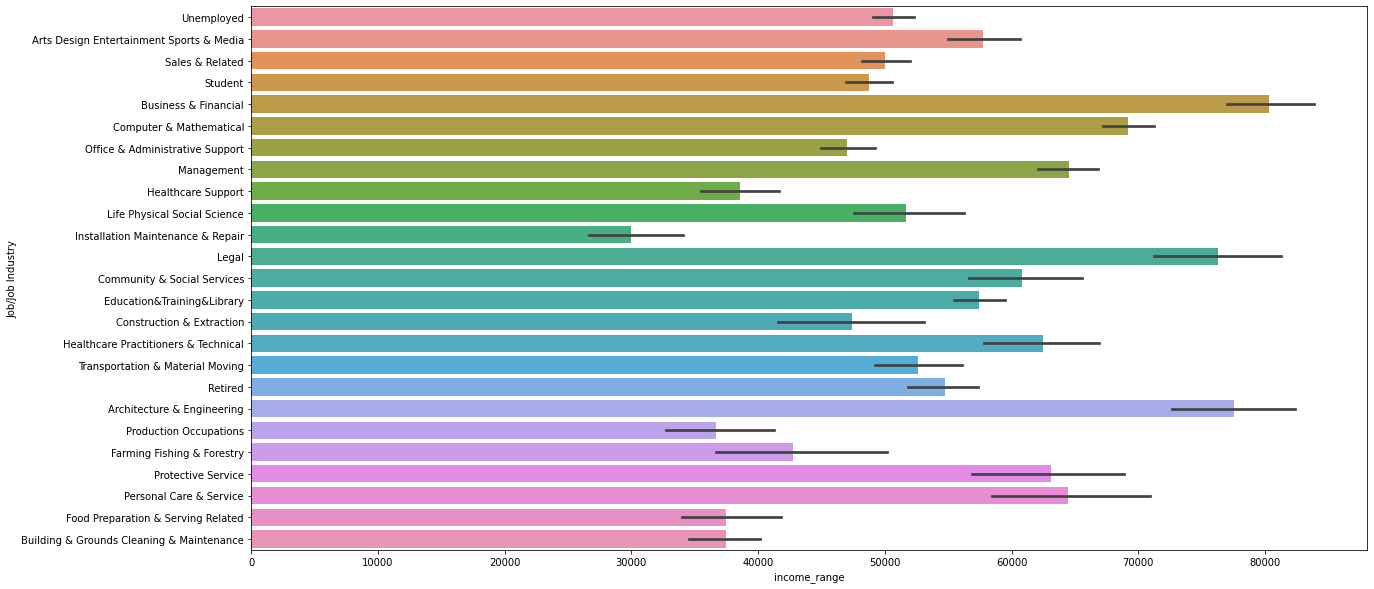

In [28]:
sns.barplot(df['income_range'],df['Job/Job Industry'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='income_range'>

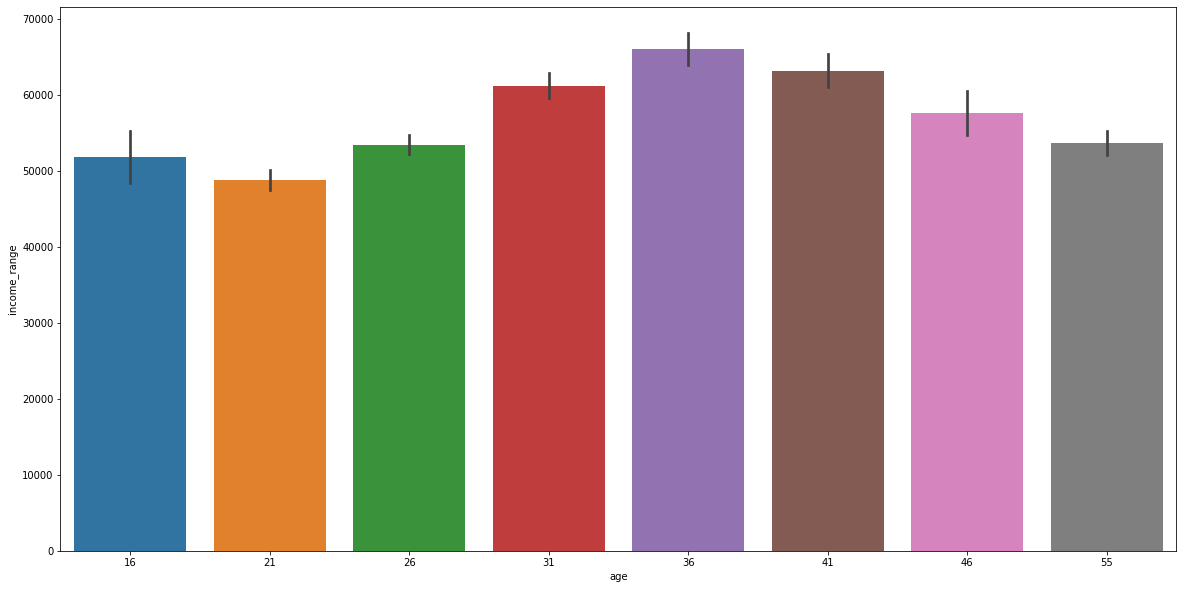

In [29]:
sns.barplot(df['age'],df['income_range'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='offer expiration', ylabel='count'>

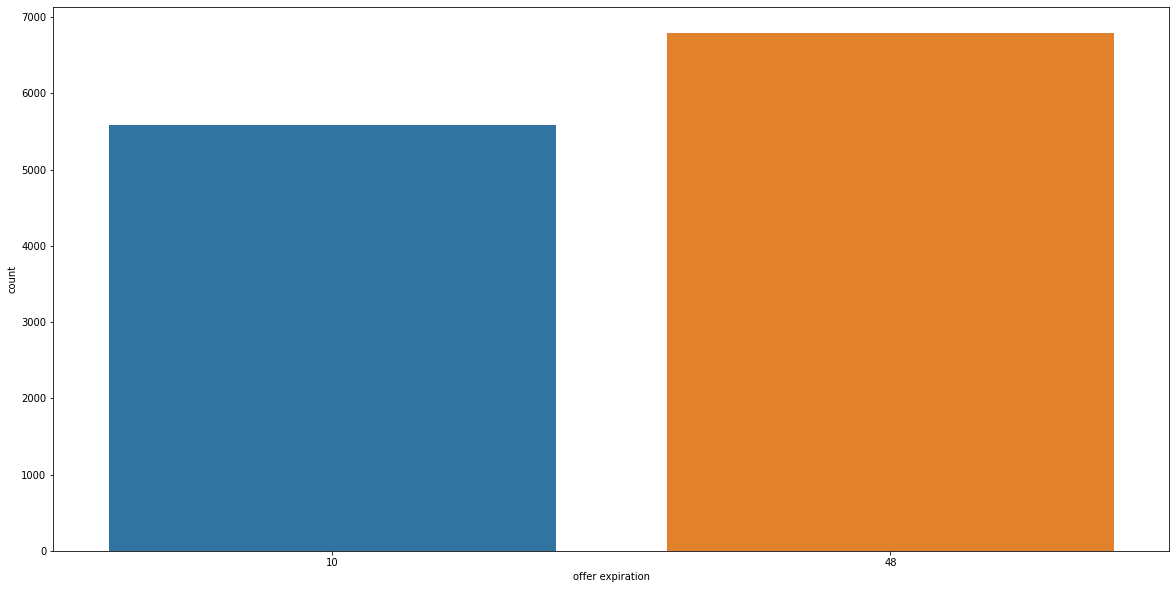

In [30]:
sns.countplot(df['offer expiration'])

In [31]:
imp=pd.crosstab(df['offer expiration'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
offer expiration,,,,
10,2640,2948,5588,52.8
48,2745,4046,6791,59.6


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income_range', ylabel='count'>

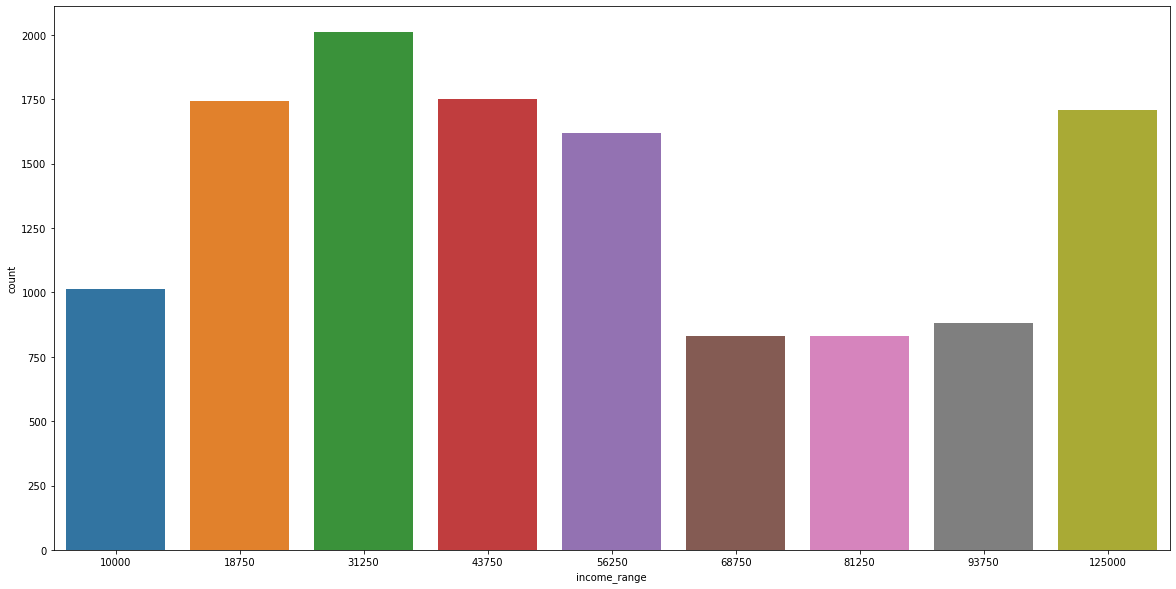

In [32]:
sns.countplot(df['income_range'])

In [33]:
imp=pd.crosstab(df['income_range'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
income_range,,,,
10000,426,586,1012,57.9
18750,746,997,1743,57.2
31250,858,1152,2010,57.3
43750,758,994,1752,56.7
56250,684,933,1617,57.7
68750,388,441,829,53.2
81250,403,427,830,51.4
93750,401,479,880,54.4
125000,721,985,1706,57.7


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Marital Status', ylabel='count'>

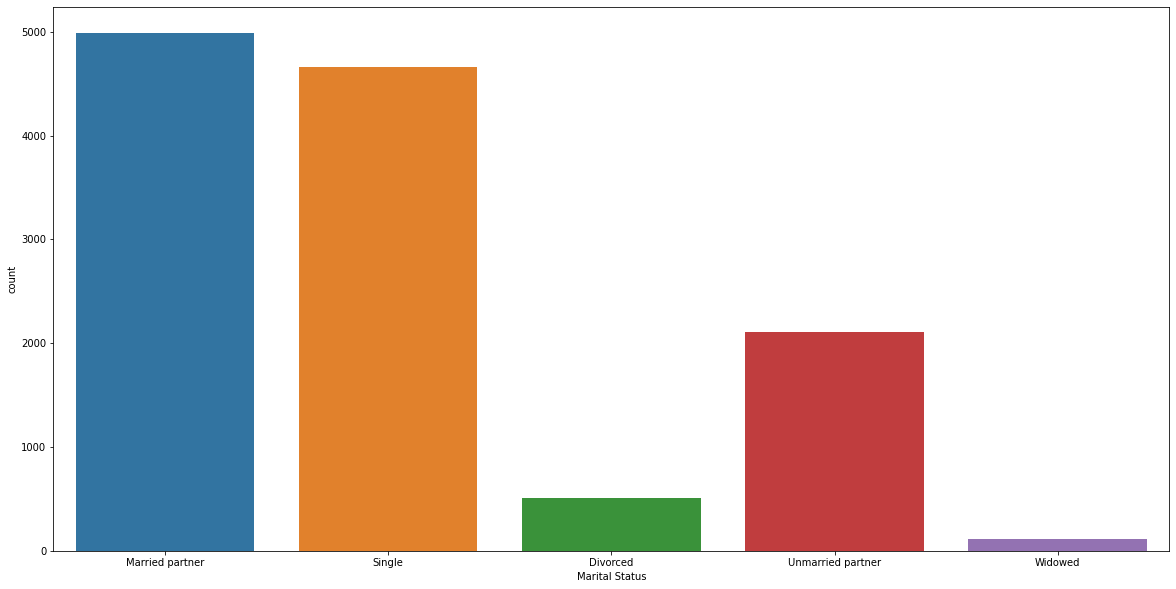

In [34]:
sns.countplot(df['Marital Status'])

In [35]:
imp=pd.crosstab(df['Marital Status'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
Marital Status,,,,
Divorced,233,279,512,54.5
Married partner,2294,2693,4987,54.0
Single,1898,2767,4665,59.3
Unmarried partner,905,1199,2104,57.0
Widowed,55,56,111,50.5


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='restaurant type', ylabel='count'>

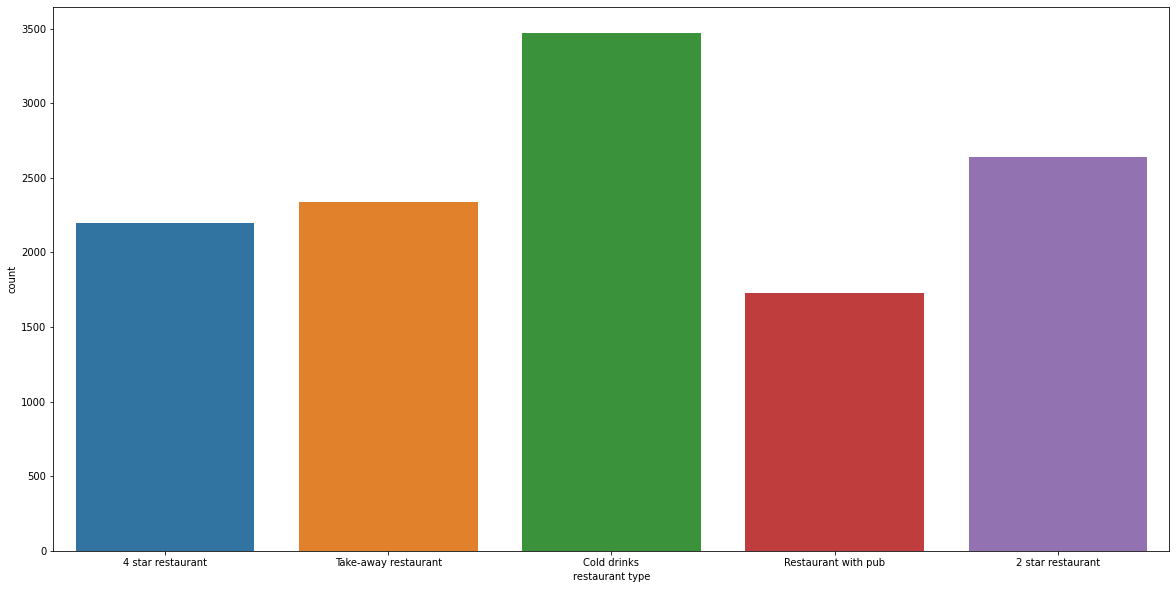

In [36]:
sns.countplot(df['restaurant type'])

In [37]:
imp=pd.crosstab(df['restaurant type'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
restaurant type,,,,
2 star restaurant,968,1674,2642,63.4
4 star restaurant,1089,1110,2199,50.5
Cold drinks,1648,1823,3471,52.5
Restaurant with pub,864,862,1726,49.9
Take-away restaurant,816,1525,2341,65.1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

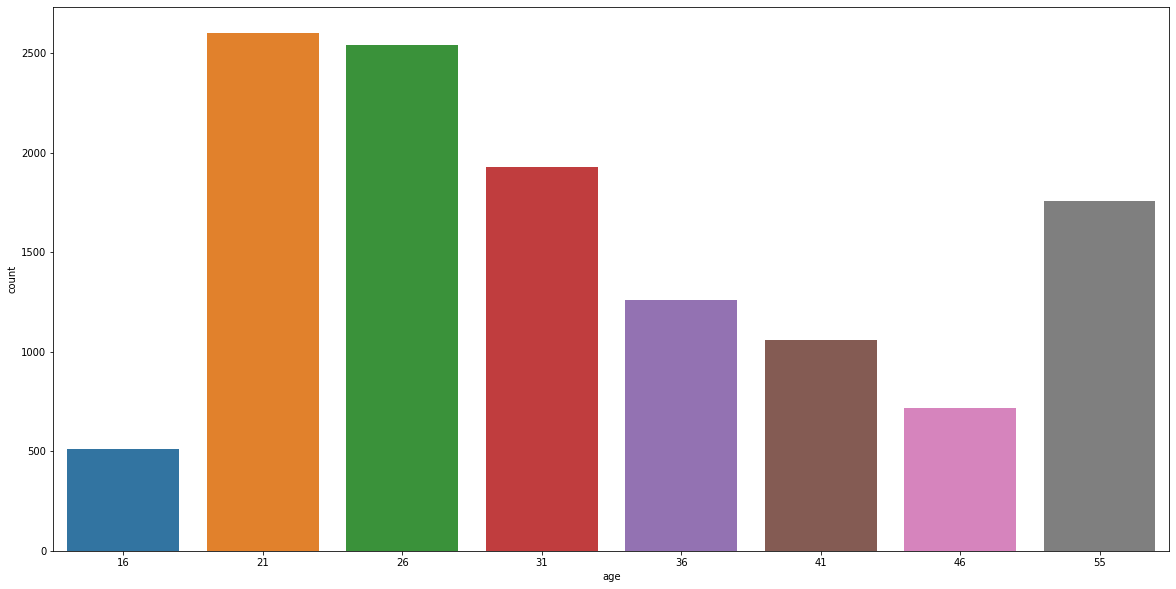

In [38]:
sns.countplot(df['age'])

In [39]:
imp=pd.crosstab(df['age'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
age,,,,
16,211,303,514,58.9
21,1043,1559,2602,59.9
26,1058,1485,2543,58.4
31,870,1059,1929,54.9
36,572,687,1259,54.6
41,482,578,1060,54.5
46,318,398,716,55.6
55,831,925,1756,52.7


In [40]:
imp=pd.crosstab(df['gender'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
gender,,,,
Female,2843,3492,6335,55.1
Male,2542,3502,6044,57.9


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Customer type', ylabel='count'>

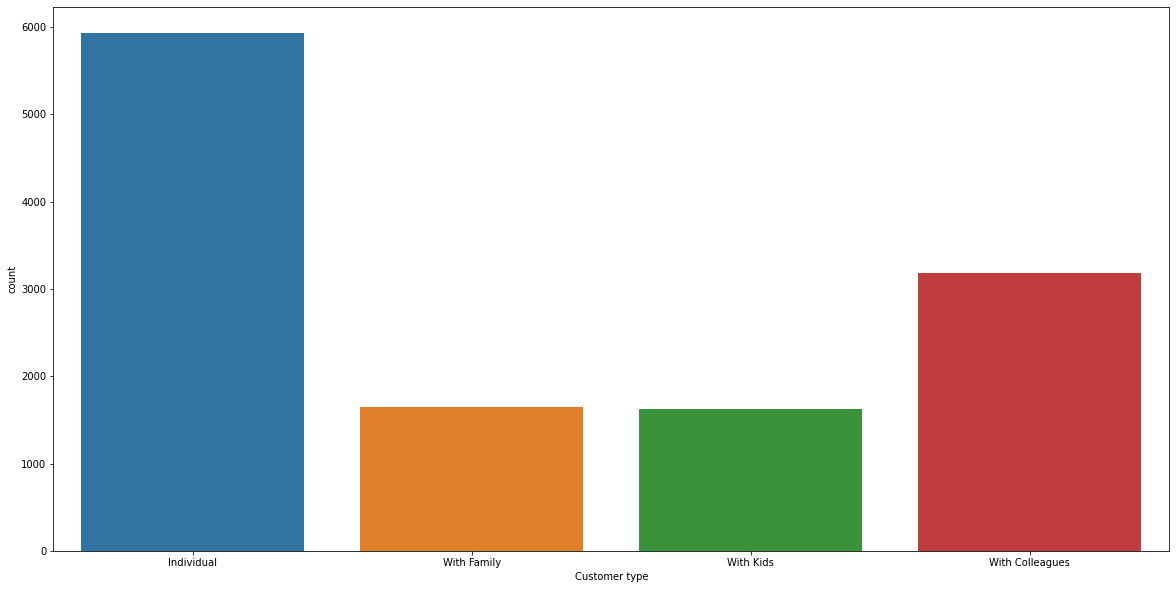

In [41]:
sns.countplot(df['Customer type'])

In [42]:
imp=pd.crosstab(df['Customer type'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
Customer type,,,,
Individual,2736,3195,5931,53.9
With Colleagues,1189,1993,3182,62.6
With Family,761,886,1647,53.8
With Kids,699,920,1619,56.8


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Climate', ylabel='count'>

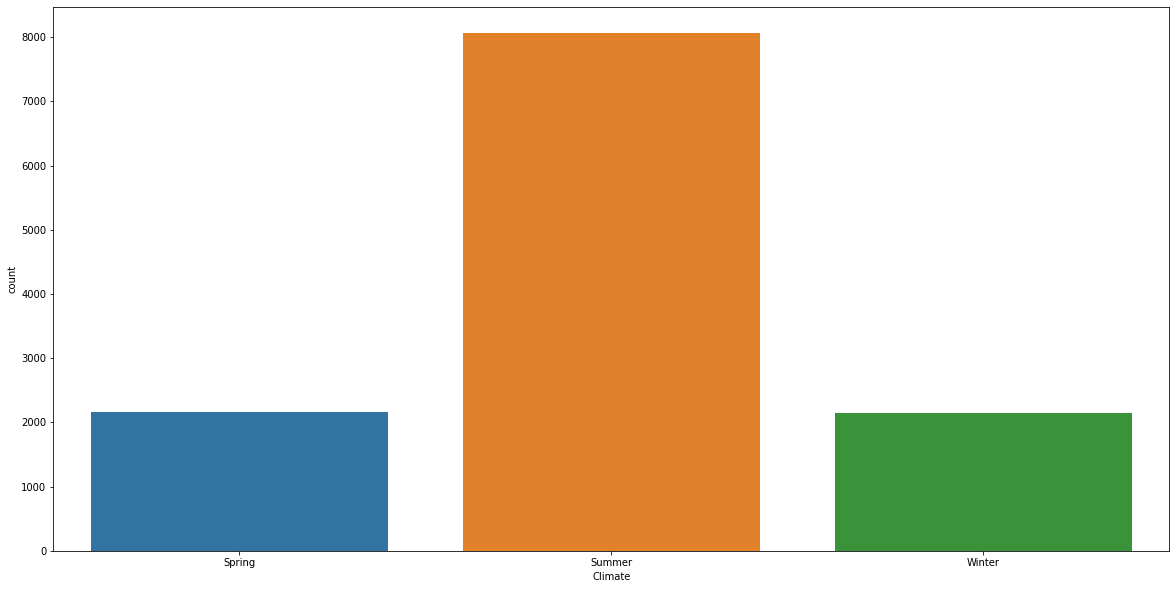

In [43]:
sns.countplot(df['Climate'])

In [44]:
imp=pd.crosstab(df['Climate'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
Climate,,,,
Spring,1019,1147,2166,53.0
Summer,3409,4656,8065,57.7
Winter,957,1191,2148,55.4


In [45]:
imp=pd.crosstab(df['Qualification'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
Qualification,,,,
1,22,58,80,72.5
2,352,487,839,58.0
3,1747,2517,4264,59.0
4,515,618,1133,54.5
5,1910,2351,4261,55.2
6,839,963,1802,53.4


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Travel Time', ylabel='count'>

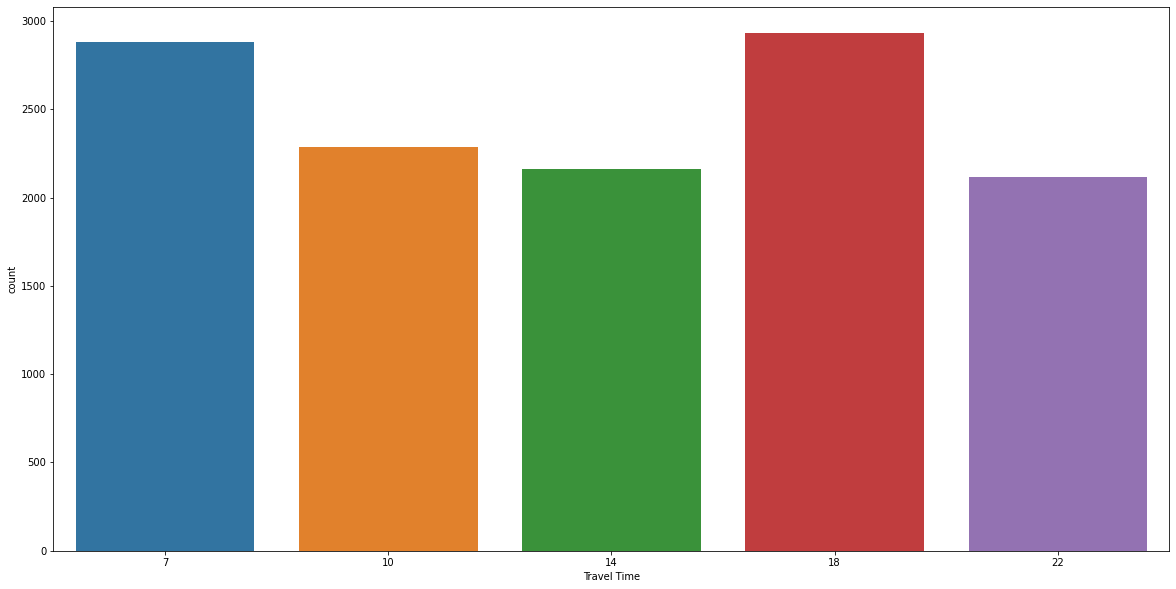

In [46]:
sns.countplot(df['Travel Time'])

In [47]:
imp=pd.crosstab(df['Travel Time'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
Travel Time,,,,
7,1350,1533,2883,53.2
10,983,1302,2285,57.0
14,866,1295,2161,59.9
18,1188,1743,2931,59.5
22,998,1121,2119,52.9


## Feature Engineering

In [48]:
df['travelled_more_than_5mins_for_offer'].value_counts()

1    12379
Name: travelled_more_than_5mins_for_offer, dtype: int64

In [49]:
direction=df[df['restuarant_opposite_direction_house']==df['restuarant_same_direction_house']]
print(direction.shape)
print('Neither in same dirrection nor in opposite direction',direction[direction['restuarant_same_direction_house']==0].shape)
print('Both in same dirrection and in opposite direction',direction[direction['restuarant_same_direction_house']==1].shape)

(794, 30)
Neither in same dirrection nor in opposite direction (392, 30)
Both in same dirrection and in opposite direction (402, 30)


In [50]:
df['travel_time_for_offer']=df['travelled_more_than_15mins_for_offer']+df['travelled_more_than_25mins_for_offer']

In [51]:
df['travel_time_for_offer']=df['travel_time_for_offer']+1

There can be four cases:
1. more than 25 min =1 and more than 15 min =1 (Preson travelled for more than 25 min)
2. more than 25 min =0 and more than 15 min =1 (Preson travelled for between 15 and 25 min)
3. more than 25 min =0 and more than 15 min =0 (Preson travelled for less than 15 min)
4. more than 25 min =1 and more than 15 min =0 (This does not make sense)

In [52]:
df[(df['travelled_more_than_25mins_for_offer']==1) & (df['travelled_more_than_15mins_for_offer']==0)].shape

(125, 31)

In [53]:
df=df.drop(['travelled_more_than_5mins_for_offer','restuarant_opposite_direction_house',
           'travelled_more_than_15mins_for_offer','travelled_more_than_25mins_for_offer'],axis=1)

In [54]:
df2['travel_time_for_offer']=df2['travelled_more_than_15mins_for_offer']+df2['travelled_more_than_25mins_for_offer']
df2['travel_time_for_offer']=df2['travel_time_for_offer']+1

In [55]:
df2=df2.drop(['travelled_more_than_5mins_for_offer','restuarant_opposite_direction_house',
           'travelled_more_than_15mins_for_offer','travelled_more_than_25mins_for_offer'],axis=1)

In [56]:
print(df.shape)

(12379, 27)


In [57]:
print(df2.shape)

(5305, 26)


In [58]:
X=df.drop('Offer Accepted',axis=1)
col=X.columns
info = pd.DataFrame(col)
info

,0
0,offer expiration
1,income_range
2,no_visited_Cold drinks
3,Restaur_spend_less_than20
4,Marital Status
5,restaurant type
6,age
7,Prefer western over chinese
8,no_visited_bars
9,gender


In [59]:
df.shape

(12379, 27)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='travel_time_for_offer', ylabel='count'>

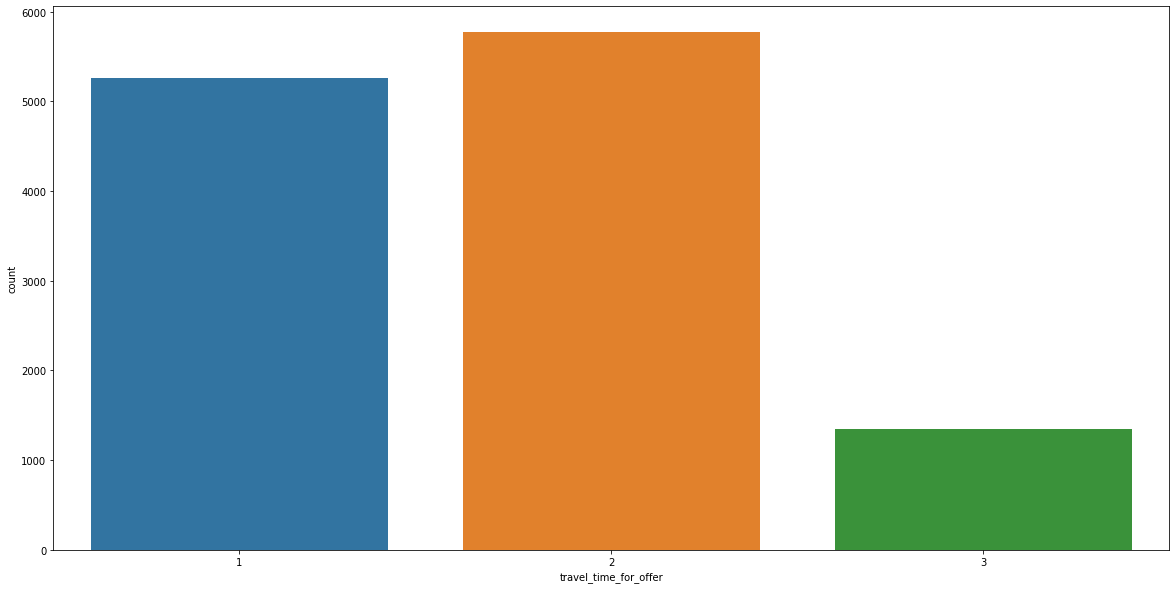

In [60]:
sns.countplot(df['travel_time_for_offer'])

In [61]:
imp=pd.crosstab(df['travel_time_for_offer'],df['Offer Accepted'])
imp['total_ppl']=imp.No + imp.Yes
imp['% accepted']=round((imp.Yes/imp.total_ppl)*100,1)
imp

Offer Accepted,No,Yes,total_ppl,% accepted
travel_time_for_offer,,,,
1,2080,3175,5255,60.4
2,2552,3219,5771,55.8
3,753,600,1353,44.3


In [62]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)

df_ohe = pd.DataFrame (ohe.fit_transform(df[['Climate','drop location','gender','Marital Status','Customer type',
                                                     'restaurant type','Job/Job Industry']]))
df2_ohe = pd.DataFrame (ohe.transform(df2[['Climate','drop location','gender','Marital Status','Customer type',
                                                     'restaurant type','Job/Job Industry']]))


df_ohe.columns = ohe.get_feature_names_out(['Climate','drop location','gender','Marital Status','Customer type',
                                                'restaurant type','Job/Job Industry'])
df2_ohe.columns = ohe.get_feature_names_out(['Climate','drop location','gender','Marital Status','Customer type',
                                                'restaurant type','Job/Job Industry'])

df.drop(['Climate','drop location','gender','Marital Status','Customer type',
              'restaurant type','Job/Job Industry'] ,axis=1, inplace=True)
df2.drop(['Climate','drop location','gender','Marital Status','Customer type'
              ,'restaurant type','Job/Job Industry'] ,axis=1, inplace=True)

ohedf= pd.concat([df, df_ohe ], axis=1)
ohedf2= pd.concat([df2, df2_ohe ], axis=1)

In [63]:
df=ohedf
df2=ohedf2

In [64]:
df = df.astype({'Prefer western over chinese':'int64','restuarant_same_direction_house':'int64',
                'Cooks regularly':'int64','is foodie':'int64','has Children':'int64',
                'visit restaurant with rating (avg)':'int64','temperature':'int64','Travel Time':'int64',
                'Prefer home food':'int64','travel_time_for_offer':'int64'})

In [65]:
df2 = df2.astype({'Prefer western over chinese':'int64','restuarant_same_direction_house':'int64',
                'Cooks regularly':'int64','is foodie':'int64','has Children':'int64',
                'visit restaurant with rating (avg)':'int64','temperature':'int64','Travel Time':'int64',
                'Prefer home food':'int64','travel_time_for_offer':'int64'})

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 67 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   offer expiration                                            12379 non-null  int64  
 1   income_range                                                12379 non-null  int64  
 2   no_visited_Cold drinks                                      12379 non-null  int64  
 3   Restaur_spend_less_than20                                   12379 non-null  int64  
 4   age                                                         12379 non-null  int64  
 5   Prefer western over chinese                                 12379 non-null  int64  
 6   no_visited_bars                                             12379 non-null  int64  
 7   restuarant_same_direction_house                             12379 non-null  int64  
 

In [67]:
df.columns = df.columns.astype(str)
df2.columns = df2.columns.astype(str)

In [68]:
df['Offer Accepted']=df['Offer Accepted'].replace(['Yes','No'],[1,0])

In [69]:
X=df.drop('Offer Accepted',axis=1)
y=df['Offer Accepted']

In [70]:
X

,offer expiration,income_range,no_visited_Cold drinks,Restaur_spend_less_than20,age,Prefer western over chinese,no_visited_bars,restuarant_same_direction_house,Cooks regularly,Qualification,is foodie,no_Take-aways,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Prefer home food,travel_time_for_offer,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C,gender_Female,gender_Male,Marital Status_Divorced,Marital Status_Married partner,Marital Status_Single,Marital Status_Unmarried partner,Marital Status_Widowed,Customer type_Individual,Customer type_With Colleagues,Customer type_With Family,Customer type_With Kids,restaurant type_2 star restaurant,restaurant type_4 star restaurant,restaurant type_Cold drinks,restaurant type_Restaurant with pub,restaurant type_Take-away restaurant,Job/Job Industry_Architecture & Engineering,Job/Job Industry_Arts Design Entertainment Sports & Media,Job/Job Industry_Building & Grounds Cleaning & Maintenance,Job/Job Industry_Business & Financial,Job/Job Industry_Community & Social Services,Job/Job Industry_Computer & Mathematical,Job/Job Industry_Construction & Extraction,Job/Job Industry_Education&Training&Library,Job/Job Industry_Farming Fishing & Forestry,Job/Job Industry_Food Preparation & Serving Related,Job/Job Industry_Healthcare Practitioners & Technical,Job/Job Industry_Healthcare Support,Job/Job Industry_Installation Maintenance & Repair,Job/Job Industry_Legal,Job/Job Industry_Life Physical Social Science,Job/Job Industry_Management,Job/Job Industry_Office & Administrative Support,Job/Job Industry_Personal Care & Service,Job/Job Industry_Production Occupations,Job/Job Industry_Protective Service,Job/Job Industry_Retired,Job/Job Industry_Sales & Related,Job/Job Industry_Student,Job/Job Industry_Transportation & Material Moving,Job/Job Industry_Unemployed
0,48,125000,6,1,36,0,1,0,1,5,0,2,0,4,67,1,22,0,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,48,93750,6,6,55,0,0,1,1,5,0,2,1,3,89,2,18,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,48,93750,1,2,26,1,0,1,0,5,1,2,1,4,67,1,7,1,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,43750,1,2,46,1,0,1,0,3,1,2,1,3,89,2,7,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,48,125000,0,2,21,0,1,0,0,3,1,8,0,3,40,1,7,0,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,10,31250,1,8,55,0,0,0,0,3,1,1,1,1,89,0,22,0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12375,48,31250,6,0,21,0,2,0,0,3,1,1,1,2,67,0,18,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12376,10,93750,6,8,31,0,2,0,1,5,1,2,0,2,89,8,18,1,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [71]:
from imblearn.over_sampling import RandomOverSampler

In [72]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
X_ros.shape

(13988, 66)

In [73]:
y.value_counts()

1    6994
0    5385
Name: Offer Accepted, dtype: int64

In [74]:
y_ros.value_counts()

0    6994
1    6994
Name: Offer Accepted, dtype: int64

## Baseline Models

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

dtc=DecisionTreeClassifier(random_state=0)
bc=BaggingClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)
abc=AdaBoostClassifier(random_state=0)
gbc=GradientBoostingClassifier(random_state=0)

models=[dtc,bc,rfc,abc,gbc]

for i in models:
    print(i)
    i.fit(X_train, y_train)
    print("training score: %.3f" % i.score(X_train, y_train))
    print("test score: %.3f" % i.score(X_test, y_test))
    y_pred=i.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

DecisionTreeClassifier(random_state=0)
training score: 1.000
test score: 0.554
[[542 515]
 [590 829]]
              precision    recall  f1-score   support

           0       0.48      0.51      0.50      1057
           1       0.62      0.58      0.60      1419

    accuracy                           0.55      2476
   macro avg       0.55      0.55      0.55      2476
weighted avg       0.56      0.55      0.56      2476


BaggingClassifier(random_state=0)
training score: 0.988
test score: 0.593
[[610 447]
 [560 859]]
              precision    recall  f1-score   support

           0       0.52      0.58      0.55      1057
           1       0.66      0.61      0.63      1419

    accuracy                           0.59      2476
   macro avg       0.59      0.59      0.59      2476
weighted avg       0.60      0.59      0.60      2476


RandomForestClassifier(random_state=0)
training score: 1.000
test score: 0.658
[[ 474  583]
 [ 265 1154]]
              precision    recall  f1-s

In [78]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_std=ss.fit_transform(X_train)
X_test_std=ss.transform(X_test)
print(X_train_std.shape)
print(X_test_std.shape)

(9903, 66)
(2476, 66)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr=LogisticRegression()
svm=SVC()

models=[lr,svm]

for model in models:
    print(model)
    model.fit(X_train_std, y_train)
    print("training score: %.3f" % model.score(X_train_std, y_train))
    print("test score: %.3f" % model.score(X_test_std, y_test))
    y_pred=i.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

LogisticRegression()
training score: 0.612
test score: 0.605
[[ 438  619]
 [ 260 1159]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50      1057
           1       0.65      0.82      0.73      1419

    accuracy                           0.64      2476
   macro avg       0.64      0.62      0.61      2476
weighted avg       0.64      0.64      0.63      2476


SVC()
training score: 0.747
test score: 0.642
[[ 438  619]
 [ 260 1159]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50      1057
           1       0.65      0.82      0.73      1419

    accuracy                           0.64      2476
   macro avg       0.64      0.62      0.61      2476
weighted avg       0.64      0.64      0.63      2476




## Hyperparameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
"""
tuned_parameters = [{
    "solver": [ 'newton-cg', 'lbfgs', 'liblinear'],
    "penalty":['l2'],
    "C":[100, 10, 1.0, 0.1, 0.01]
}]

clf_GBC_CV = GridSearchCV(
    LogisticRegression(), tuned_parameters,
)
clf_GBC_CV.fit(X_train_std, y_train)

print("Best parameters:")
print()
print(clf_GBC_CV.best_params_)
print()
print("Grid scores:")
means = clf_GBC_CV.cv_results_["mean_test_score"]
stds = clf_GBC_CV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,clf_GBC_CV.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")
    
"""

'\ntuned_parameters = [{\n    "solver": [ \'newton-cg\', \'lbfgs\', \'liblinear\'],\n    "penalty":[\'l2\'],\n    "C":[100, 10, 1.0, 0.1, 0.01]\n}]\n\nclf_GBC_CV = GridSearchCV(\n    LogisticRegression(), tuned_parameters,\n)\nclf_GBC_CV.fit(X_train_std, y_train)\n\nprint("Best parameters:")\nprint()\nprint(clf_GBC_CV.best_params_)\nprint()\nprint("Grid scores:")\nmeans = clf_GBC_CV.cv_results_["mean_test_score"]\nstds = clf_GBC_CV.cv_results_["std_test_score"]\nfor mean, std, params in zip(means, stds,clf_GBC_CV.cv_results_[\'params\']):\n    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")\n    \n'

In [82]:
"""
tuned_parameters = [{
    "kernel": ['rbf'],
    "C":[50, 10, 1.0, 0.1, 0.01]
}]

clf_GBC_CV = GridSearchCV(
    SVC(), tuned_parameters,
)
clf_GBC_CV.fit(X_train_std, y_train)

print("Best parameters:")
print()
print(clf_GBC_CV.best_params_)
print()
print("Grid scores:")
means = clf_GBC_CV.cv_results_["mean_test_score"]
stds = clf_GBC_CV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,clf_GBC_CV.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")
    
"""

'\ntuned_parameters = [{\n    "kernel": [\'rbf\'],\n    "C":[50, 10, 1.0, 0.1, 0.01]\n}]\n\nclf_GBC_CV = GridSearchCV(\n    SVC(), tuned_parameters,\n)\nclf_GBC_CV.fit(X_train_std, y_train)\n\nprint("Best parameters:")\nprint()\nprint(clf_GBC_CV.best_params_)\nprint()\nprint("Grid scores:")\nmeans = clf_GBC_CV.cv_results_["mean_test_score"]\nstds = clf_GBC_CV.cv_results_["std_test_score"]\nfor mean, std, params in zip(means, stds,clf_GBC_CV.cv_results_[\'params\']):\n    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")\n    \n'

In [83]:
"""
tuned_parameters = [{
    "learning_rate": [ 0.1, 0.15, 0.2,0.25,0.3],
    "max_depth":[3,4,5,6,8],
    "n_estimators":[10,50,75,100,125,150]
}]

clf_GBC_CV = GridSearchCV(
    GradientBoostingClassifier(), tuned_parameters,
)
clf_GBC_CV.fit(X_train, y_train)

print("Best parameters:")
print()
print(clf_GBC_CV.best_params_)
print()
print("Grid scores:")
means = clf_GBC_CV.cv_results_["mean_test_score"]
stds = clf_GBC_CV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,clf_GBC_CV.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")

"""

'\ntuned_parameters = [{\n    "learning_rate": [ 0.1, 0.15, 0.2,0.25,0.3],\n    "max_depth":[3,4,5,6,8],\n    "n_estimators":[10,50,75,100,125,150]\n}]\n\nclf_GBC_CV = GridSearchCV(\n    GradientBoostingClassifier(), tuned_parameters,\n)\nclf_GBC_CV.fit(X_train, y_train)\n\nprint("Best parameters:")\nprint()\nprint(clf_GBC_CV.best_params_)\nprint()\nprint("Grid scores:")\nmeans = clf_GBC_CV.cv_results_["mean_test_score"]\nstds = clf_GBC_CV.cv_results_["std_test_score"]\nfor mean, std, params in zip(means, stds,clf_GBC_CV.cv_results_[\'params\']):\n    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")\n\n'

In [84]:
"""
tuned_parameters = [{
    "learning_rate": [0.001, 0.01, 0.1],
    "max_depth":[3, 7, 9],
    "n_estimators":[10, 100, 500,750],
    "subsample":[0.5, 0.7, 1.0]
}]

clf_GBC_CV = GridSearchCV(
    GradientBoostingClassifier(), tuned_parameters,
)
clf_GBC_CV.fit(X_train, y_train)

print("Best parameters:")
print()
print(clf_GBC_CV.best_params_)
print()
print("Grid scores:")
means = clf_GBC_CV.cv_results_["mean_test_score"]
stds = clf_GBC_CV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,clf_GBC_CV.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")
    
"""

'\ntuned_parameters = [{\n    "learning_rate": [0.001, 0.01, 0.1],\n    "max_depth":[3, 7, 9],\n    "n_estimators":[10, 100, 500,750],\n    "subsample":[0.5, 0.7, 1.0]\n}]\n\nclf_GBC_CV = GridSearchCV(\n    GradientBoostingClassifier(), tuned_parameters,\n)\nclf_GBC_CV.fit(X_train, y_train)\n\nprint("Best parameters:")\nprint()\nprint(clf_GBC_CV.best_params_)\nprint()\nprint("Grid scores:")\nmeans = clf_GBC_CV.cv_results_["mean_test_score"]\nstds = clf_GBC_CV.cv_results_["std_test_score"]\nfor mean, std, params in zip(means, stds,clf_GBC_CV.cv_results_[\'params\']):\n    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")\n    \n'

In [85]:
lr=LogisticRegression(C = 0.01, penalty= 'l2', solver= 'liblinear')
svm=SVC(C = 1.0, kernel= 'rbf')
models=[lr,svm]

for model in models:
    print(model)
    model.fit(X_train_std, y_train)
    print("training score: %.3f" % model.score(X_train_std, y_train))
    print("test score: %.3f" % model.score(X_test_std, y_test))
    y_pred=i.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

LogisticRegression(C=0.01, solver='liblinear')
training score: 0.612
test score: 0.605
[[ 438  619]
 [ 260 1159]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50      1057
           1       0.65      0.82      0.73      1419

    accuracy                           0.64      2476
   macro avg       0.64      0.62      0.61      2476
weighted avg       0.64      0.64      0.63      2476


SVC()
training score: 0.747
test score: 0.642
[[ 438  619]
 [ 260 1159]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50      1057
           1       0.65      0.82      0.73      1419

    accuracy                           0.64      2476
   macro avg       0.64      0.62      0.61      2476
weighted avg       0.64      0.64      0.63      2476




In [86]:
gb1=GradientBoostingClassifier(learning_rate= 0.25, max_depth= 3, n_estimators= 150)
gb2=GradientBoostingClassifier(learning_rate= 0.01, max_depth= 7, n_estimators= 750, subsample= 0.7)
models=[gb1,gb2]

for model in models:
    print(model)
    model.fit(X_train, y_train)
    print("training score: %.3f" % model.score(X_train, y_train))
    print("test score: %.3f" % model.score(X_test, y_test))
    y_pred=i.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

GradientBoostingClassifier(learning_rate=0.25, n_estimators=150)
training score: 0.704
test score: 0.637
[[ 438  619]
 [ 260 1159]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50      1057
           1       0.65      0.82      0.73      1419

    accuracy                           0.64      2476
   macro avg       0.64      0.62      0.61      2476
weighted avg       0.64      0.64      0.63      2476


GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=750,
                           subsample=0.7)
training score: 0.898
test score: 0.657
[[ 438  619]
 [ 260 1159]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50      1057
           1       0.65      0.82      0.73      1419

    accuracy                           0.64      2476
   macro avg       0.64      0.62      0.61      2476
weighted avg       0.64      0.64      0.63      2476




In [87]:
pred=gb2.predict(X_test)

In [88]:
confusion_matrix(y_test, pred)

array([[ 501,  556],
       [ 293, 1126]])

In [89]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.47      0.54      1057
           1       0.67      0.79      0.73      1419

    accuracy                           0.66      2476
   macro avg       0.65      0.63      0.63      2476
weighted avg       0.65      0.66      0.65      2476



In [90]:
gbc=GradientBoostingClassifier(learning_rate= 0.01, max_depth= 7, n_estimators= 750, subsample= 0.7)
gbc.fit(X, y)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=750,
                           subsample=0.7)

In [91]:
import xgboost as xgb

In [92]:
regressor_0 = xgb.XGBClassifier()

In [93]:
regressor_0.fit(X_train, y_train)
print("training score: %.3f" % regressor_0.score(X_train, y_train))
print("test score: %.3f" % regressor_0.score(X_test, y_test))

training score: 0.919
test score: 0.642


In [94]:
regressor = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [95]:
regressor.fit(X_train, y_train)
print("training score: %.3f" % regressor.score(X_train, y_train))
print("test score: %.3f" % regressor.score(X_test, y_test))

training score: 0.691
test score: 0.645


In [96]:
regressor.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [97]:
regressor_0.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [98]:
y_pred=gbc.predict(df2)
y_sub=pd.Series(y_pred)
y_sub=y_sub.replace([1,0],['Yes','No'])

In [99]:
submission=pd.DataFrame(columns=['id','Offer Accepted'])
submission['id']=[i for i in range(len(y_pred))]
submission['Offer Accepted']=y_sub

In [100]:
submission.to_csv('submission.csv',index=False)